## Externality Diagram

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from ipywidgets import interact, interact_manual, fixed
import numpy as np


plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18


In [2]:
Q = np.linspace(0.1,10,num=10)
Q_ = Q
F=10
A = 12
c = 1
b = 2
EC = 4

In [3]:
def D(Q, A=12, b=1):
    return A - b*Q

def TC(Q,F=F,c=c):
    return F + c*Q**b

def MC(Q, c=c):
    return c*Q

def profit(P,Q,F=F,c=c):
    return P*Q - TC(Q,F,c)

def isoprofplot(Q,profit=0, F=F, c=c):
    return (profit + TC(Q,F,c))/Q

def zeroprofitprice(F,c):
    Qmin = (F/c*(b-1))**(1/b)
    return MC(Qmin, F, c)

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

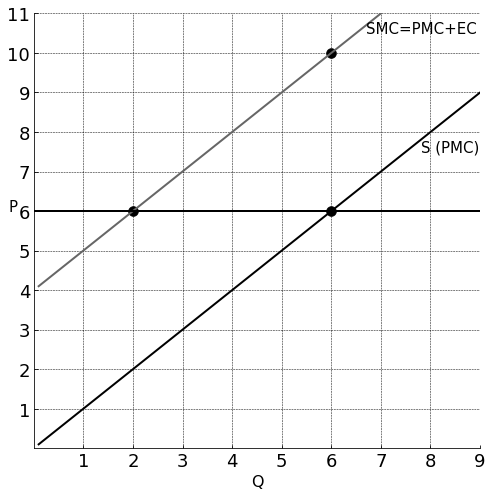

In [5]:
plt.figure(figsize=(8,8))
plt.style.use('grayscale')
#plt.plot(Q,D(Q))
plt.plot(Q_,MC(Q_))
plt.plot(Q,MC(Q)+EC)
plt.xlim(0,9)
plt.ylim(0,10)
plt.xlabel('Q',fontsize=16)
#plt.ylabel('P', fontsize=16)
plt.text(-0.5,6,'P', fontsize=15)
plt.grid(b=True, which='minor', lw=30)
plt.text(7.8,7.5,'S (PMC)',fontsize=15)
plt.text(6.7,6.5+EC,'SMC=PMC+EC',fontsize=15)
#plt.text(7.8,D(7.6),'D (SMB)',fontsize=15)
plt.axhline(6)
plt.xticks([i for i in range(1,10,1)])
plt.yticks([i for i in range(1,12,1)]);
ptx = [2, 6, 6] 
pty = [6, 6, 10]
plt.scatter(ptx, pty, s=100)
#for i, px in enumerate(ptx):
#    plt.plot([px,px],[0,pty[i]], linestyle=":")
#    plt.plot([0,px],[px, pty[i]], linestyle=":")
plt.show();


In [6]:
zeroprofitprice(100,c)

TypeError: MC() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
def firm(P,F):
    qc = (P/(b*c))**(1/(b-1))
    print(r'Qc = {:.2f},    Profit  = {:.2f}'.format(qc,profit(P,qc,F,c)))
    fig, ax = plt.subplots(3,1,figsize=(8,12))
    ax[0].plot(Q,P*Q)
    ax[0].plot(Q, TC(Q,F), lw=2.5)
    ax[0].text(90, TC(80), r'$TC$', fontsize=15)
    ax[0].text(60, P*80, r'$TR=P\cdot Q$', fontsize=15)
    ax[0].axvline(qc,linestyle='dashed')

    ax[1].plot(Q, P*Q - TC(Q,F,c))
    ax[1].axhline(0,linestyle='dashed')
    ax[1].axvline(qc,linestyle='dashed')
    ax[2].axvline(qc,linestyle='dashed')
    ax[1].set_ylim(-100,300)
  
    ax[2].axhline(P)
    ax[2].set_ylim(0,25)
    ax[2].plot(Q,MC(Q),'red')
    ax[2].set_xlabel('Q -- quantity')
    ax[2].set_ylabel('Price')
    ax[2].text(90, MC(80), r'MC', fontsize=15)
    # ax[2].plot(Q, isoprofplot(Q, profit=0, F=F,c=c))
    ax[2].axhline(zeroprofitprice(F,c), linestyle = ':')
    ax[2].text(70, zeroprofitprice(F,c)-1,'zero profit price')

In [ ]:
firm(10,100)

In [ ]:
interact(firm,P=(2,15,1),F=(0,400,50))